C:\Users\ASUS\AppData\Local\Temp\ipykernel_28108\4258456614.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return -1*M*pow(x, 3)/f_prime(x)/pow(xi, 2)


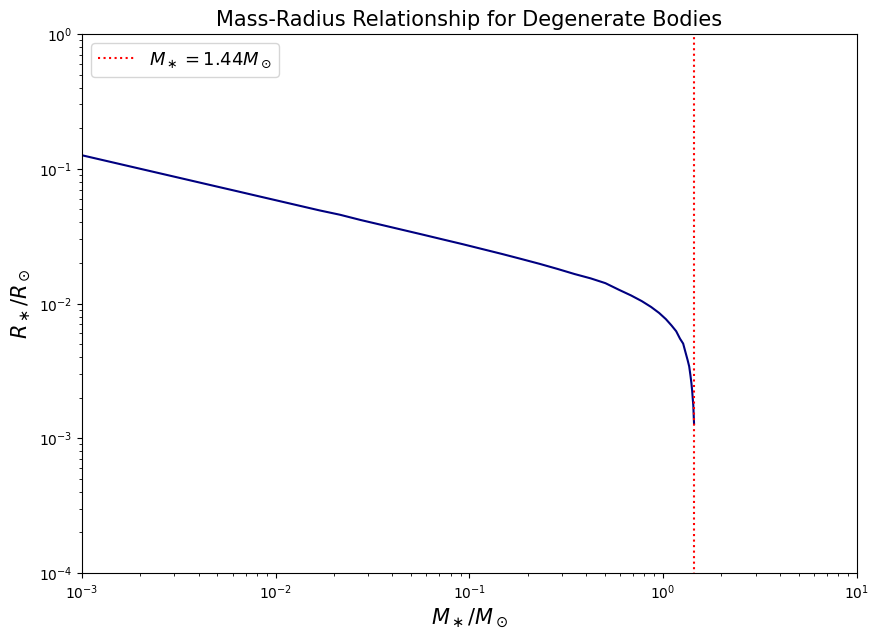

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f_prime(x):
    my_sqrt = np.sqrt(1 + pow(x,2))
    outcome = (6*pow(x,2) - 3)*my_sqrt + pow(x, 2)*(2*pow(x, 2) - 3)/my_sqrt \
    + 3/(x + my_sqrt)*(1 + x/my_sqrt)
    return outcome

def dM_dxi(x, xi):
    return 4*np.pi*pow(xi, 2)*pow(x, 3)

def dx_dxi(M, x, xi):
    return -1*M*pow(x, 3)/f_prime(x)/pow(xi, 2)
init_xi = 1e-4
step_xi = 1e-3
refin_factor = 0.75 # refinement factor 
refin_limit = 1e-2
max_frac_var = 2e-2 # maximum fractional change
M_star_limit = 1e-4 # will be used to find mass of star
x_guesses = np.logspace(-2, 1.5) # for Runge-Kutta
xi_outcomes = []
M_outcomes = []
M_sun = 1.9891e33 # [g]
R_sun = 6.9598e10 # [cm]

M_h = 1.6736e-24 # [g]
M_e = 9.1094e-28 # [g]
Mu_e = 2
H = 6.6261e-27 # [erg s]
C = 2.9979e10 # [cm s^-1]
P_o = 6.003e22 # [dyn cm^-2]
G = 6.6726e-8 # [dyn cm^2 g^-2]
rho_o = (8.0*np.pi/3.0)*pow((M_e*C/H),3)*(Mu_e*M_h) # [g cm^-3]
R_o = np.sqrt(P_o/rho_o)/np.sqrt(G*rho_o) # [cm]

for x_guess in x_guesses:
    current_xi = init_xi # start very close to, but not at 0
    x_current = x_guess
    M_current = 0
    
    while x_current > M_star_limit:
        step_current_xi = step_xi
        
        # 2nd order Runge Kutta
        test_dx = step_current_xi*dx_dxi(M_current, x_current, current_xi)
        dx = step_current_xi*dx_dxi(M_current, x_current + 0.5*test_dx, current_xi + 0.5*step_current_xi)
        dM = step_current_xi*dM_dxi(x_current, current_xi + 0.5*step_current_xi)
        
        # if our mass varies too quickly, attenuate the step size
        while (M_current > refin_limit and abs(dM/M_current) > max_frac_var):
            step_current_xi = step_current_xi * refin_factor
            
            test_dx = step_current_xi*dx_dxi(M_current, x_current, current_xi)
            dx = step_current_xi*dx_dxi(M_current, x_current + 0.5*test_dx, current_xi + 0.5*step_current_xi)
            dM = step_current_xi*dM_dxi(x_current, current_xi + 0.5*step_current_xi)
        
        M_current += dM
        x_current += dx
        current_xi += step_current_xi
        
    M_outcomes.append(M_current)
    xi_outcomes.append(current_xi)

# Now, turn the outcomes into physical outcomes
M_phys = rho_o * pow(R_o,3)*np.array(M_outcomes)
M_phys /= M_sun

R_phys = R_o * np.array(xi_outcomes)
R_phys /= R_sun
final_index = np.where(M_phys > 1.44)[0][0]

plt.rcParams["figure.figsize"] = [10, 7]
plt.plot(M_phys[:final_index+1],R_phys[:final_index+1], color='navy')
plt.plot([1.44,1.44],[1e-5,1e1],':', color='red',label=r'$M_\ast=1.44M_\odot$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1e1])
plt.ylim([1e-4,1e0])
plt.xlabel(r'$M_\ast/M_\odot$', fontsize=15)
plt.ylabel(r'$R_\ast/R_\odot$', fontsize=15)
plt.title('Mass-Radius Relationship for Degenerate Bodies', fontsize=15)
plt.legend(fontsize=13)
plt.show()

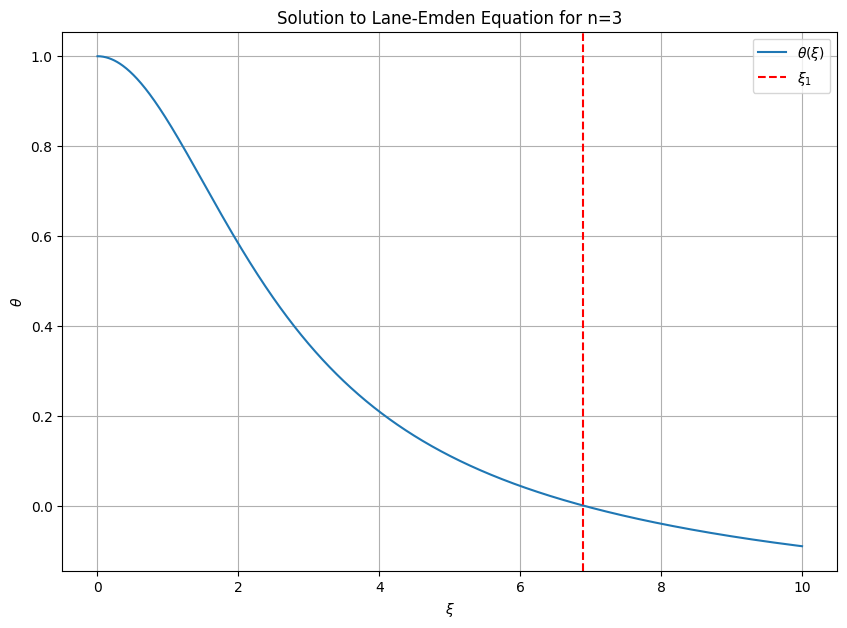

First root of theta (xi_1) = 6.896927927927928
Chandrasekhar Mass Limit (theory) = 1.44 solar masses


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Lane-Emden equations for n=3
def lane_emden(theta, xi):
    dtheta_dxi = theta[1]
    d2theta_dxi2 = -2/xi * theta[1] - theta[0]**3
    return [dtheta_dxi, d2theta_dxi2]

# Boundary conditions at xi = 0
theta_0 = [1, 0]  # Initial conditions: theta(0) = 1, dtheta/dxi(0) = 0

# Set the range for xi
xi = np.linspace(1e-4, 10, 1000)  # Small nonzero starting value for xi to avoid singularity

# Solve the Lane-Emden equation
solution = odeint(lane_emden, theta_0, xi)

# Extract theta and its derivative
theta = solution[:, 0]
dtheta_dxi = solution[:, 1]

# Find the first root where theta crosses zero, which is the boundary of the star
xi_1_index = np.where(theta <= 0)[0][0]
xi_1 = xi[xi_1_index]

# Compute the Chandrasekhar mass
M_chandrasekhar = 1.44  # Chandrasekhar mass limit in solar masses, from theory

# Plot the results
plt.plot(xi, theta, label=r'$\theta(\xi)$')
plt.axvline(xi_1, color='red', linestyle='--', label=r'$\xi_1$')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta$')
plt.title('Solution to Lane-Emden Equation for n=3')
plt.legend()
plt.grid(True)
plt.show()

# Print the result for xi_1
print(f"First root of theta (xi_1) = {xi_1}")
print(f"Chandrasekhar Mass Limit (theory) = {M_chandrasekhar} solar masses")